In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [31]:
x_plot

array([-3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01,  2.66453526e-15,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00,  2.00000000e+00,  2.10000000e+00,
        2.20000000e+00,  

0.0
1.0
0.24197072451914337


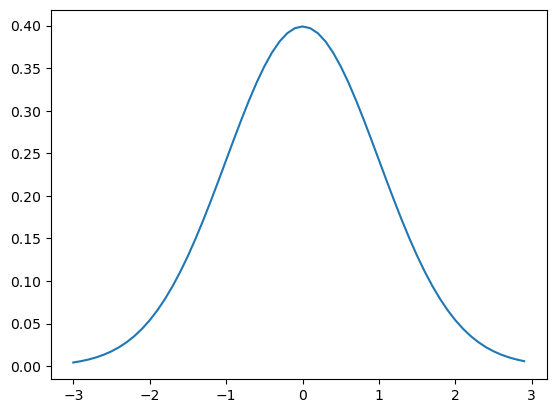

In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

sn=stats.norm(loc=0,scale=1)
print(sn.mean())
print(sn.std())
print(sn.pdf(x=1))

x_plot = np.arange(-3.0,3.0,0.1)
plt.plot(x_plot, stats.norm.pdf(loc=0,scale=1,x=x_plot))

0.0009543571712608149
0.9884548511795506


<AxesSubplot:ylabel='Density'>

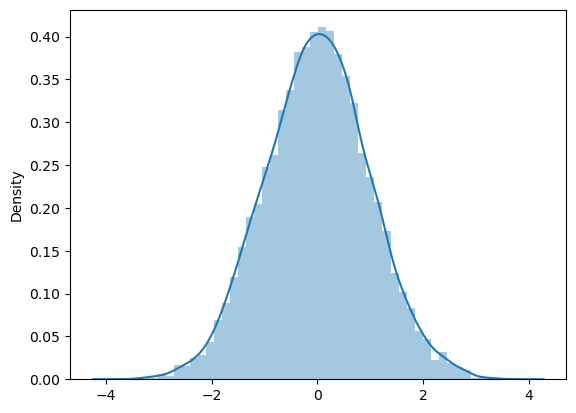

In [13]:
# 평균 0, 표준편차 1인 정규분포에서 10,000개의 랜덤 표본을 생성
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sn=stats.norm.rvs(loc=0,scale=1,size=10000)
print(sn.mean())
print(sn.std())

sns.distplot(sn)

<AxesSubplot:ylabel='Density'>

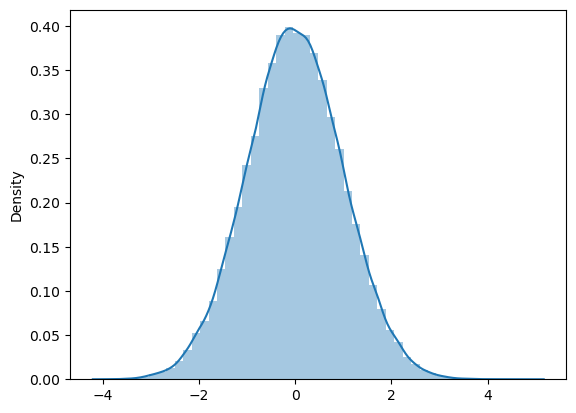

In [11]:
# 표준정규분포에서 100,000개의 랜덤표본을 생성
nr = np.random.randn(100000)
sns.distplot(nr)

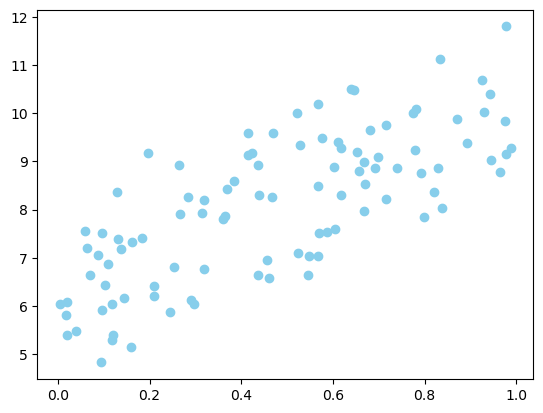

In [36]:
import pandas as pd

np.random.seed(0)
x = np.random.rand(100,1)
y = 6+4*x+np.random.randn(100,1)

plt.scatter(x,y,c='skyblue')

기계 학습 알고리즘은 종종 입력 데이터를 2차원 배열 형태로 받습니다. 일반적으로 각 행(row)은 개별 샘플(sample)을 나타내고, 각 열(column)은 특성(feature)을 나타냅니다.

이 경우 X는 100x1의 2차원 배열입니다. 100은 데이터의 샘플 개수를 나타내고, 1은 특성의 개수를 나타냅니다. 즉, 이 데이터 세트에는 100개의 샘플과 1개의 특성이 있습니다.

만약 X를 1차원 배열로 만든다면, 그것은 100개의 원소를 가진 배열이 될 것입니다. 이것은 여전히 100개의 샘플을 나타냅니다만, 이는 대부분의 기계 학습 알고리즘에 직접적으로 입력으로 사용될 수 없습니다. 그 이유는 대부분의 알고리즘이 예상하고 있는 데이터의 형태가 각 샘플의 특성들을 포함하는 2차원 배열이기 때문입니다.

따라서 X를 2차원 배열로 만드는 이유는 이러한 기계 학습 알고리즘과의 호환성을 유지하기 위한 것입니다.

[비용 최소화]  

- 비용함수 R(w)는 변수가 w 파라미터로 이뤄진 함수이며 R(w)를 최소화하는 w0와 w1의 값은 R(w)를 w0, w1으로 순차적으로 편미분해 얻을 수 있다.  
 w1 편미분값 : $-2/N*sigmax*diff$, w0 편미분값 : $-2/N*sigma*diff$
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결과값을 마이너스 하면서 적용한다. 
- 편미분값이 너무 클 수 있기 때문에 보정 계수를 곱하는데 이를 학습률이라고 한다.

In [42]:
# w1 w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1,w0,x,y,learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(x,w1.T) + w0
    diff = y-y_pred
    w0_factors = np.ones((N,1)) # 가로로 긴 행렬
    w1_update = -(2/N)*learning_rate*(np.dot(x.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update, w0_update

In [40]:
# 반복적으로 경사 하강법을 이용하여 위 함수를 호출하여 w1과 w0을 업데이트하는 함수 생성
# 입력인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함

def gradient_descent_steps(x,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,x,y,learning_rate=0.01)
        w1 = w1- w1_update
        w0 = w0- w0_update
    return w1,w0

In [29]:
# 예측 오차 비용 계산을 수행하는 함수 생성 및 경사 하강법 수행

def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1,w0 = gradient_descent_steps(x,y,iters=1000)
print('w1:{0:.4f} w0:{1:4f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] *x+w0
print('GD Total Cost:{0:4f}'.format(get_cost(y,y_pred)))

w1:3.7740 w0:6.304736
GD Total Cost:0.994677


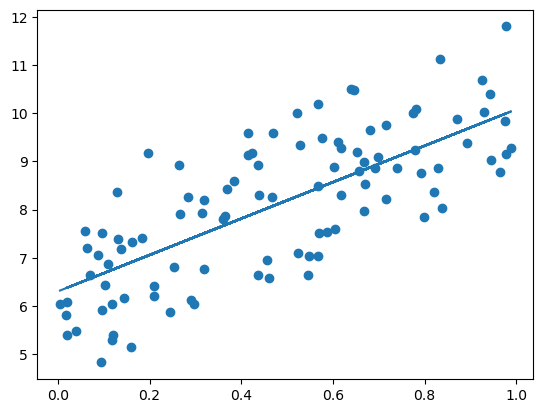

In [30]:
plt.scatter(x,y)
plt.plot(x,y_pred)

In [22]:
# 미니 배치 확률적 경사하강법으로 w0, w1및 예측 오류 비용을 계산하세요.

# 확률적 경사 하강법 : 대용량 데이터의 경우 일부 데이터만 이용해 W가 업데이트 되는 값을 계산. 
# 경사 하강법에 비해서 빠른 속도 보장
# 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출
def stochastic_gradient_descent_steps(x,y,batch_size = 10, iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    prev_cost = 100000
    iter_index=0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(x.shape[0])
        sample_x = x[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update,w0_update = get_weight_updates(w1,w0,sample_x, sample_y, learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
        
    return w1,w0

In [23]:
w1,w0 = stochastic_gradient_descent_steps(x,y,iters=1000)
print('w1:',round(w1[0,0],3),'w0:',round(w1[0,0],3))
y_pred =w1[0,0]*x+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 3.79 w0: 3.79
Stochastic Gradient Descent Total Cost:0.9942


In [11]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [6]:
bostonDF.B.describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

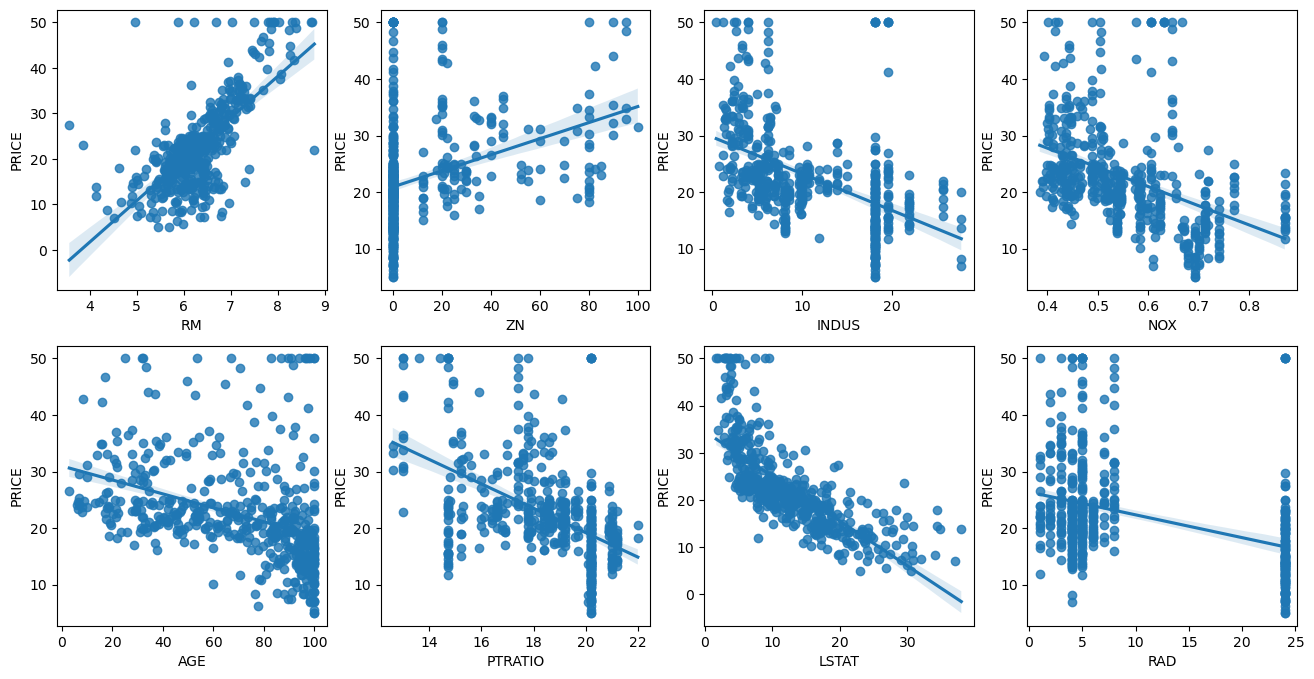

In [13]:
# 2개의 행과 4개의 열을 가진 subplots을 이용, axs는 4,2의 ax를 가짐

fig,axs =plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])
    
fig1 = plt.gcf()
fig1.savefig('p322_boston.tif',format='tif',dpi=300, bbox_inches='tight')

In [ ]:
# RM, LSTAT 이 중요한 변수임을 확인!

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 모델링 객체 만들기
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('mse :{0:.3f}, rmse:{1:.3f}'.format(mse,rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test,y_preds)))

mse :17.297, rmse:4.159
Variance score:0.757


In [24]:
print('절편 값:',lr.intercept_)
print('회귀 계수값',np.round(lr.coef_,1))

절편 값: 40.99559517216412
회귀 계수값 [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [26]:
# 회귀계수를 큰 값 순으로 정렬하기 위해 시리즈로 생성, 인덱스가 칼럼명에 유의

coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort

In [30]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

lr = LinearRegression()

# cross_val_score()로 5 fold 셋으로 mse를 구한 뒤 이를 기반으로 다시 rmse를 구함
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(neg_mse_scores*-1)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수 !

print('5 folds의 개별 negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE :{0:.3f}'.format(avg_rmse))

5 folds의 개별 negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE :5.829


In [33]:
# 상관관계가 높은 RM, LSTAT만 확인
# 과대적합을 방지할 수 있다. (상관관계가 낮은 것들로 모델 만들면 과대적합 위험도 높아짐)

from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF[['RM','LSTAT']]
# X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

lr = LinearRegression()

# cross_val_score()로 5 fold 셋으로 mse를 구한 뒤 이를 기반으로 다시 rmse를 구함
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(neg_mse_scores*-1)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수 !

print('5 folds의 개별 negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE :{0:.3f}'.format(avg_rmse))

5 folds의 개별 negative MSE scores: [-11.79 -28.97 -47.84 -71.77 -36.61]
5 folds의 개별 RMSE scores: [3.43 5.38 6.92 8.47 6.05]
5 folds의 평균 RMSE :6.051
